In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pyplot
import seaborn as sns 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-deep-learning/main/day3/placement.csv")
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
df.shape

(100, 3)

<AxesSubplot: >

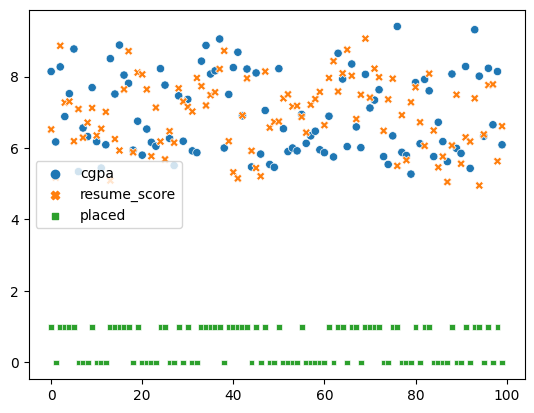

In [6]:
sns.scatterplot(df)

<AxesSubplot: xlabel='cgpa', ylabel='resume_score'>

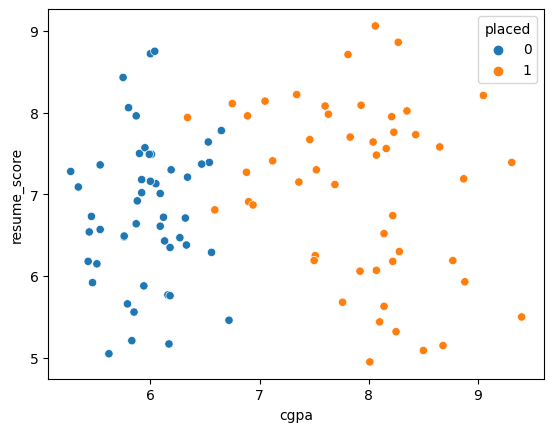

In [16]:
sns.scatterplot(df,x=df['cgpa'],y=df['resume_score'],hue=df['placed'])

In [17]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [20]:
#X-Dataframe
#y-series

In [22]:
from sklearn.linear_model import Perceptron

In [58]:
p=Perceptron(random_state=42)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
p.fit(X_train,y_train)


Perceptron(random_state=42)

In [62]:
p.coef_

array([[ 41.94, -40.4 ]])

In [63]:
p.intercept_

array([-36.])

In [64]:
p.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [65]:
p.score(X_train,y_train)

0.7910447761194029

In [66]:
p.score(X_test,y_test)

0.6060606060606061

In [67]:
from mlxtend.plotting import plot_decision_regions

/config/workspace/env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot: >

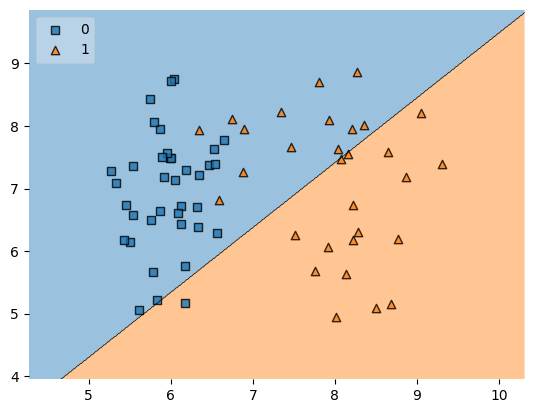

In [68]:
plot_decision_regions(X_train.values, y_train.values, clf=p, legend=2)

/config/workspace/env/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<AxesSubplot: >

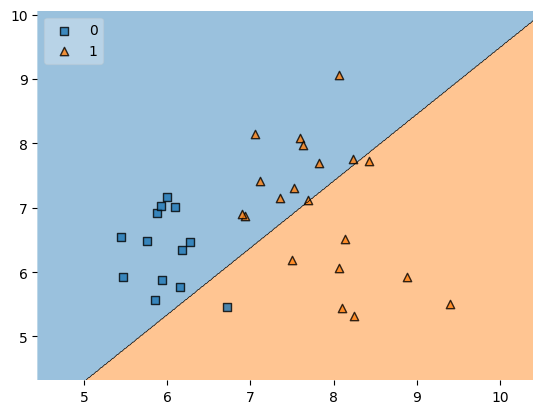

In [69]:
plot_decision_regions(X_test.values, y_test.values, clf=p, legend=2)

In [70]:
p.score(X_train,y_train)

0.7910447761194029

In [71]:
p.score(X_test,y_test)

0.6060606060606061

In [72]:
from sklearn.model_selection import cross_validate

In [73]:
# Perform 5-fold cross-validation
cv_results = cross_validate(p, X, y, cv=5)

# Print the results
print(cv_results)


{'fit_time': array([0.00333905, 0.00260401, 0.00249028, 0.00260663, 0.00255275]), 'score_time': array([0.0017724 , 0.00183535, 0.00167513, 0.00168514, 0.00169182]), 'test_score': array([0.8 , 0.65, 0.75, 0.55, 0.5 ])}


In [74]:
from sklearn.model_selection import StratifiedKFold

# Create a stratified k-fold cross-validator
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold stratified cross-validation
cv_results = cross_validate(p, X, y, cv=stratified_cv)

# Print the results
print(cv_results)

{'fit_time': array([0.00369978, 0.00291252, 0.00287533, 0.00255704, 0.00242829]), 'score_time': array([0.0018518 , 0.00181317, 0.00171351, 0.00169683, 0.00180387]), 'test_score': array([0.6 , 0.85, 0.65, 0.7 , 0.65])}


In [50]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define custom scoring metrics
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Perform 5-fold cross-validation with custom scoring metrics
cv_results = cross_validate(p, X, y, cv=5, scoring=scoring)

# Print the results
print(cv_results)

{'fit_time': array([0.00369453, 0.00357223, 0.00286841, 0.00289583, 0.00276017]), 'score_time': array([0.01105404, 0.00704718, 0.0068357 , 0.00667405, 0.00681591]), 'test_precision': array([0.8       , 0.77472527, 0.77777778, 0.77472527, 0.83333333]), 'test_recall': array([0.8 , 0.75, 0.6 , 0.75, 0.75]), 'test_f1_score': array([0.8       , 0.74424552, 0.52380952, 0.74424552, 0.73333333])}


In [52]:
cv_results = cross_validate(p, X, y, cv=5, return_train_score=True)
print(cv_results)

{'fit_time': array([0.00338078, 0.00282955, 0.00270581, 0.00254655, 0.00258541]), 'score_time': array([0.00254083, 0.0017395 , 0.00174093, 0.0018785 , 0.00173068]), 'test_score': array([0.8 , 0.75, 0.6 , 0.75, 0.75]), 'train_score': array([0.75  , 0.7625, 0.6125, 0.8   , 0.7875])}


In [54]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Create an SVM model and a random forest model
svm = SVC(kernel='linear', C=1, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
p = p=Perceptron()

# Perform 5-fold cross-validation for both models
cv_results_svm = cross_validate(svm, X, y, cv=5)
cv_results_rf = cross_validate(rf, X, y, cv=5)
cv_results_p = cross_validate(p, X, y, cv=5)

# Print the results
print("SVM:", cv_results_svm)
print("Random Forest:", cv_results_rf)
print("perceptron:", cv_results_p)

SVM: {'fit_time': array([0.00347328, 0.0031054 , 0.00267601, 0.00256801, 0.00250292]), 'score_time': array([0.00336003, 0.00178337, 0.00174212, 0.00170636, 0.00192022]), 'test_score': array([1.  , 1.  , 1.  , 0.9 , 0.95])}
Random Forest: {'fit_time': array([0.15651894, 0.15381527, 0.15318322, 0.15279675, 0.15266585]), 'score_time': array([0.01306081, 0.01333928, 0.01322603, 0.01328516, 0.01319027]), 'test_score': array([1. , 1. , 1. , 0.9, 0.9])}
perceptron: {'fit_time': array([0.00261307, 0.00245738, 0.0026176 , 0.00248718, 0.00262117]), 'score_time': array([0.00173855, 0.00186348, 0.00165105, 0.00170183, 0.00165892]), 'test_score': array([0.8 , 0.75, 0.6 , 0.75, 0.75])}
